# Cross-Country Comparison
<p><b>Objective:</b> Synthesize the cleaned datasets from Benin, Sierra Leone, and Togo to
identify relative solar potential and key differences across countries.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Data Loading

In [4]:
benin = pd.read_csv("../data/benin-malanville.csv")
sierra_leone = pd.read_csv("../data/sierraleone-bumbuna.csv")
togo = pd.read_csv("../data/togo-dapaong_qc.csv")

# Add a 'Country' column for identification
benin["Country"] = "Benin"
sierra_leone["Country"] = "Sierra Leone"
togo["Country"] = "Togo"

# Combine all into one DataFrame
df_all = pd.concat([benin, sierra_leone, togo], ignore_index=True)


# 2. Metric Comparison – Boxplots
Use seaborn/matplotlib to plot side-by-side boxplots by metric and country:

C:\Users\የአብትዕግስት\AppData\Local\Temp\ipykernel_12716\1248848102.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="Country", y=metric, palette="Set2")


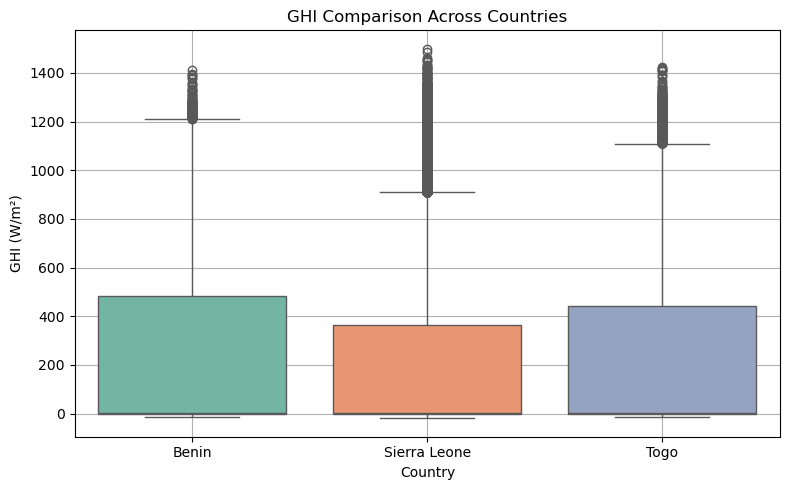

C:\Users\የአብትዕግስት\AppData\Local\Temp\ipykernel_12716\1248848102.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="Country", y=metric, palette="Set2")


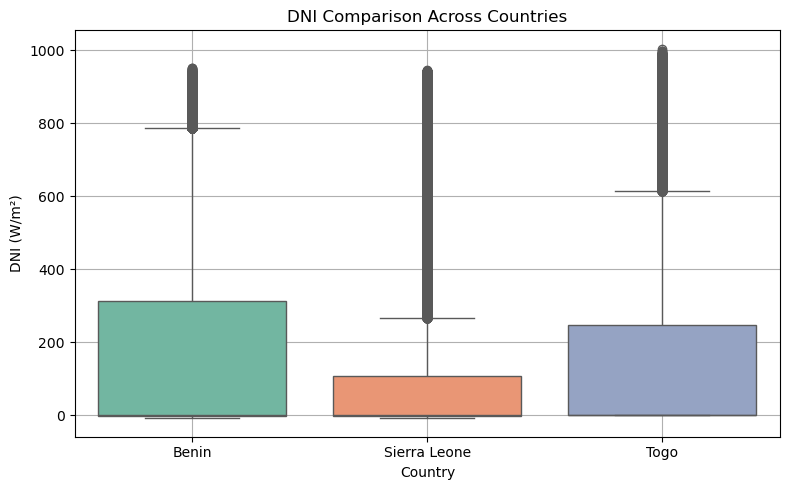

C:\Users\የአብትዕግስት\AppData\Local\Temp\ipykernel_12716\1248848102.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="Country", y=metric, palette="Set2")


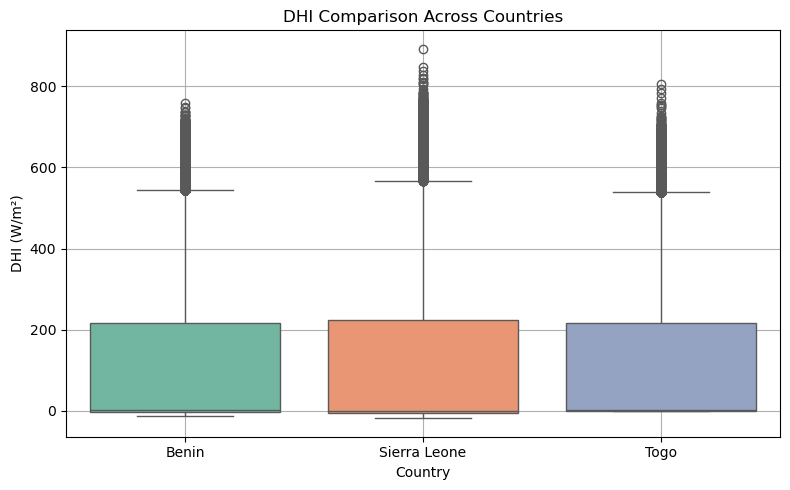

In [5]:
for metric in ["GHI", "DNI", "DHI"]:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_all, x="Country", y=metric, palette="Set2")
    plt.title(f"{metric} Comparison Across Countries")
    plt.ylabel(f"{metric} (W/m²)")
    plt.xlabel("Country")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 3. Summary Table – Descriptive Statistics
<p>
This table helps answer:

Which country has the highest average GHI?

Where is the variability (std) highest?
</p>

In [6]:
summary_stats = df_all.groupby("Country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"]).round(2)
display(summary_stats)


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         158.69  
Sierra Leone  158.95  
Togo          156.52

# 4. Statistical Testing – ANOVA or Kruskal–Wallis
To determine if differences in GHI between countries are statistically significant:

In [7]:
from scipy.stats import f_oneway, kruskal

# Extract GHI values per country
ghi_benin = benin["GHI"].dropna()
ghi_sierra = sierra_leone["GHI"].dropna()
ghi_togo = togo["GHI"].dropna()

# ANOVA
f_stat, p_val_anova = f_oneway(ghi_benin, ghi_sierra, ghi_togo)
print(f"One-way ANOVA p-value: {p_val_anova:.4f}")

# Optional: Kruskal–Wallis (non-parametric)
h_stat, p_val_kruskal = kruskal(ghi_benin, ghi_sierra, ghi_togo)
print(f"Kruskal–Wallis p-value: {p_val_kruskal:.4f}")


One-way ANOVA p-value: 0.0000
Kruskal–Wallis p-value: 0.0000


Interpretation:

If p < 0.05 → significant differences in solar potential.

Note this in markdown with a sentence like:

"ANOVA revealed significant differences in GHI between countries (p = 0.0032)."

# 5. Summary  
### Key Observations
- **Sierra Leone** shows the highest median GHI but also the largest variability, indicating fluctuating solar potential.
- **Togo** has relatively consistent GHI and DNI, suggesting stable solar conditions.
- **Benin** presents moderate irradiance levels with lower variability compared to Sierra Leone.
